<img src="https://miro.medium.com/max/690/1*xzF10JmR3K0rnZ8jtIHI_g.png">

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree

## Loading Data

In [4]:
df = pd.read_csv("Iris (1).csv")

## Understanding Dataset

In [5]:
display(df.shape,df.head())

(150, 6)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
for i in df:
    print("Data type of {} is {} and it contains {} unique values".format(i,df[i].dtypes,df[i].nunique()))
    print(end="\n\n")

Data type of Id is int64 and it contains 150 unique values


Data type of SepalLengthCm is float64 and it contains 35 unique values


Data type of SepalWidthCm is float64 and it contains 23 unique values


Data type of PetalLengthCm is float64 and it contains 43 unique values


Data type of PetalWidthCm is float64 and it contains 22 unique values


Data type of Species is object and it contains 3 unique values




In [7]:
#Removing id
df.drop("Id",axis=1,inplace=True)

In [8]:
#Checking null values in the dataset and if there is any null values it will be removed
for i in df:
    if(df[i].isna().any()==True):
        if(df[i].dtypes=="object"):
            df[i]=df[i].fillna(df[i].mode()[0])
        else:
            if(df[i].skew()<0 or df[i].skew()>1):
                df[i]=df[i].fillna(df[i].median())
            else:
                df[i] = df[i].fillna(df[i].mean())
    else:
        print("There is no null values in",i)

There is no null values in SepalLengthCm
There is no null values in SepalWidthCm
There is no null values in PetalLengthCm
There is no null values in PetalWidthCm
There is no null values in Species


In [9]:
#Rechecking is there are any null values or not
print(df.isna().any())
print(end="\n\n")
print(df.isnull().sum())

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


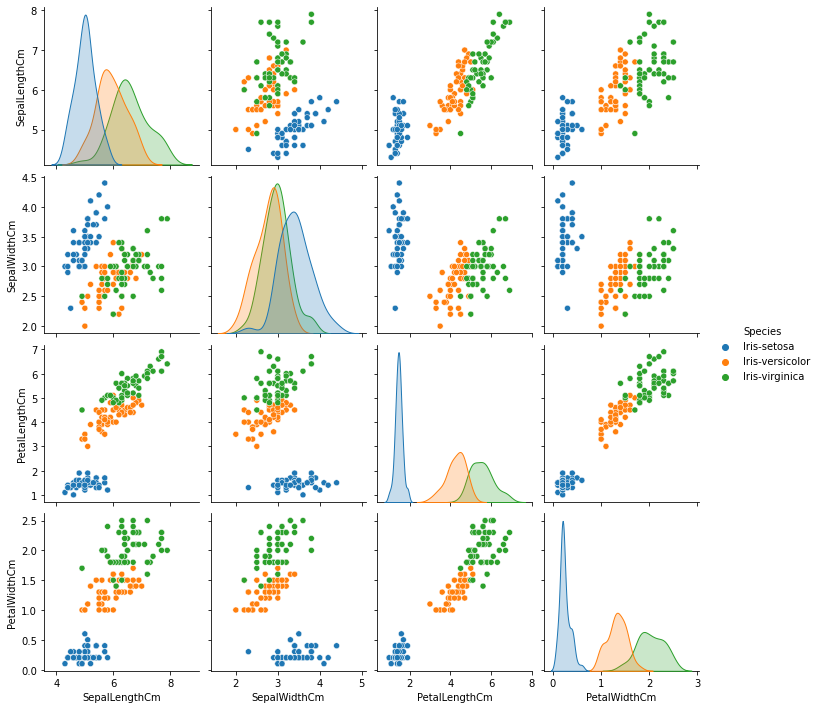

In [10]:
sns.pairplot(data=df,hue="Species")
plt.show()

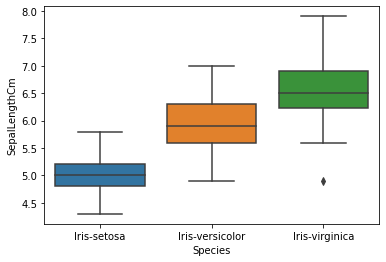

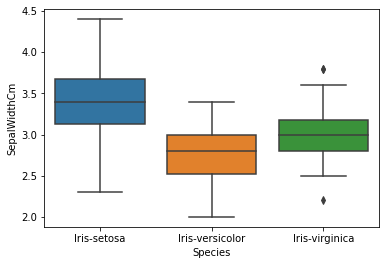

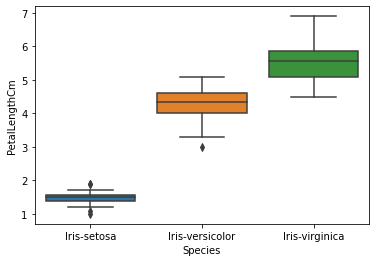

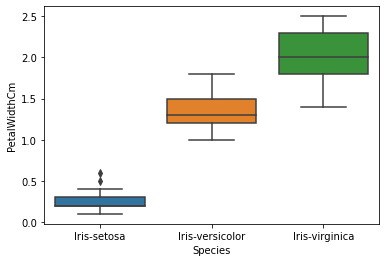

In [11]:
for i in df.drop("Species",axis=1):
    sns.boxplot(data=df , x = "Species" , y = df[i])
    plt.show()

In [14]:
#Label Encoding
label = LabelEncoder()
for i in df:
    if(df[i].nunique()<4 and df[i].dtype == "object"):
        df[i]=label.fit_transform(df[i])
    else:
        df[i]=df[i]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


None

<AxesSubplot:>

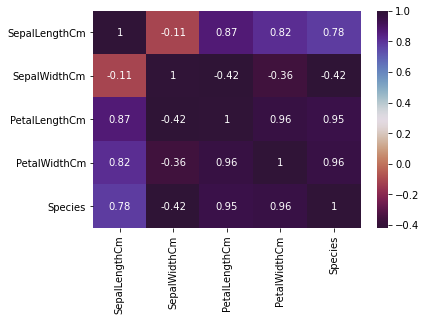

In [16]:
display(df.corr(),print(end="\n\n"),sns.heatmap(df.corr(),annot=True,cmap="twilight_shifted_r"))

## Splitting data into x and y variable

In [17]:
y = df["Species"]
x = df.drop("Species",axis=1)

## Splitting Data into training and testing set

In [19]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [20]:
print(x_train.shape)
print(x_test.shape)

(112, 4)
(38, 4)


SepalLengthCm


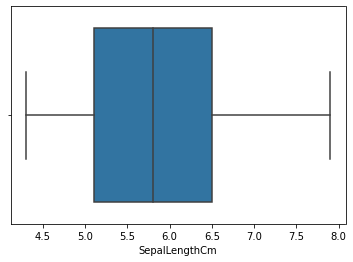

SepalWidthCm


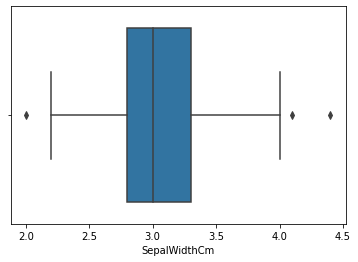

PetalLengthCm


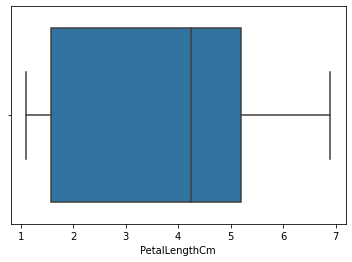

PetalWidthCm


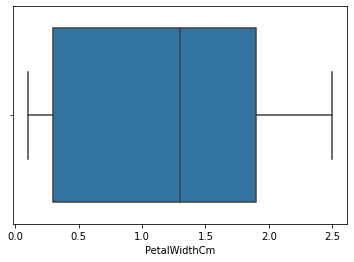

In [21]:
#Checking outliers in training dataset

for i in x_train:
    print(i)
    sns.boxplot(data=x_train,x=i)
    plt.show()
  #only spealwidthCm contain outlier  

In [23]:
# Calculating 25th and 75th percentile value
q1 = np.percentile(x_train["SepalWidthCm"],25)
q3 = np.percentile(x_train["SepalWidthCm"],75)
# Calculating upper and lower limit value
IQR  = q3-q1
upper_limit = q3 +1.5*IQR
lower_limit = q1 -1.5*IQR

In [24]:
print("25th percentile value of SepalWidthCm is",q1)
print("75th percentile value of SepalWidthCm is",q3)

25th percentile value of SepalWidthCm is 2.8
75th percentile value of SepalWidthCm is 3.3


In [25]:
#Caping outlier
x_train["SepalWidthCm"] = np.where(x_train["SepalWidthCm"]>upper_limit,upper_limit,np.where(x_train["SepalWidthCm"]<lower_limit,lower_limit,x_train["SepalWidthCm"]))

<ipython-input-25-12a172b88afc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["SepalWidthCm"] = np.where(x_train["SepalWidthCm"]>upper_limit,upper_limit,np.where(x_train["SepalWidthCm"]<lower_limit,lower_limit,x_train["SepalWidthCm"]))


In [26]:
dtc = DecisionTreeClassifier()

In [27]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

# Accuracy of decision tree model

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
print("The accuracy of decision tree model is",accuracy_score(y_test,dtc.predict(x_test)))

The accuracy of decision tree model is 0.9736842105263158


In [30]:
print(classification_report(y_test,dtc.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# vizualizing decision tree

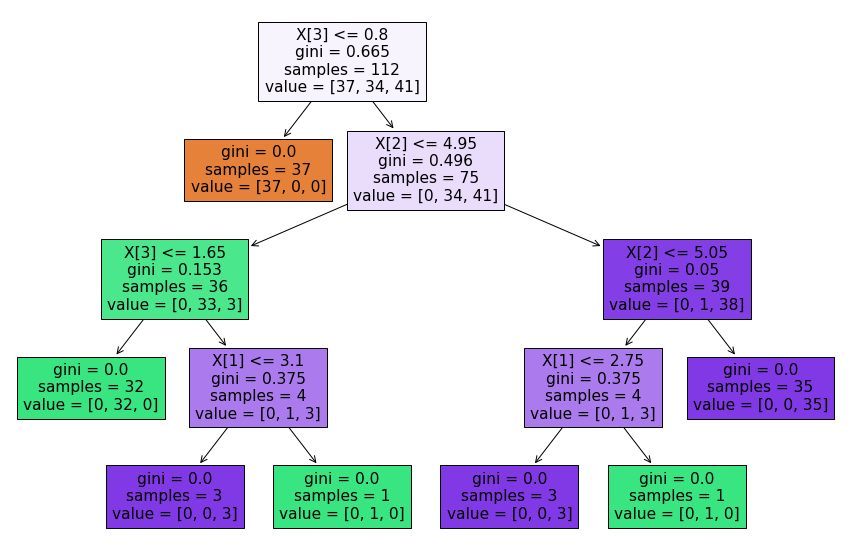

In [33]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)
plt.show()

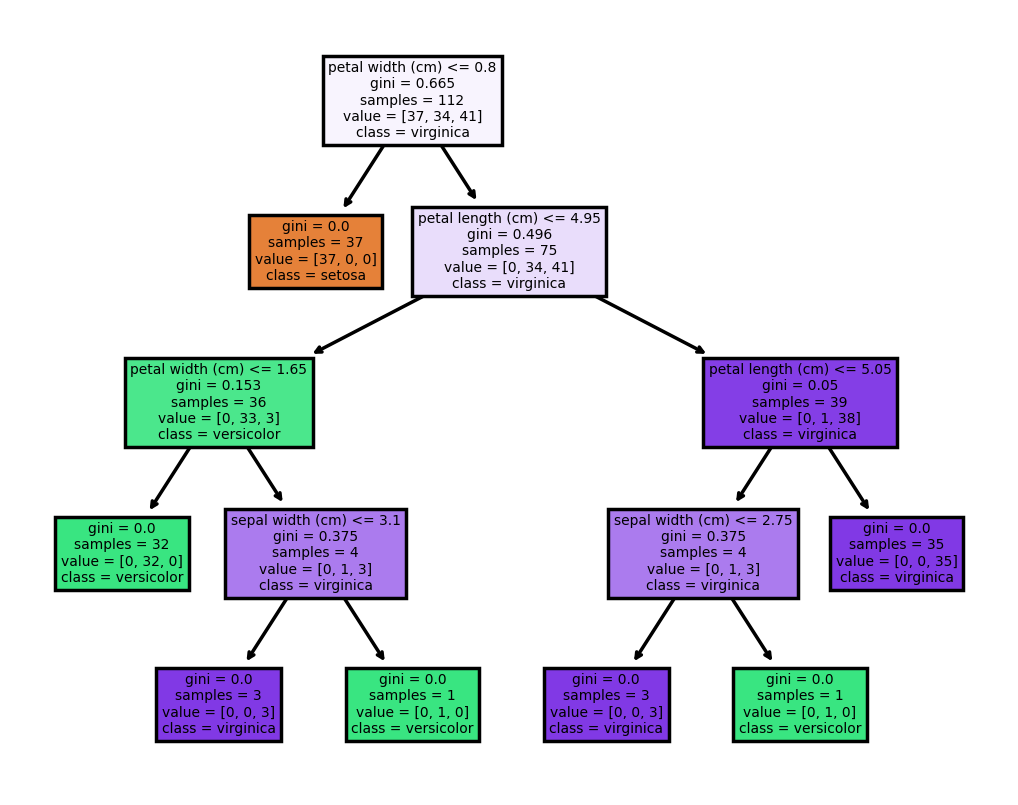

In [40]:
independent_features=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
target_feature=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=250)
tree.plot_tree(dtc,
               feature_names = independent_features, 
               class_names=target_feature,
               filled = True);